In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
df=pd.read_csv("goldstock.csv")

In [77]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [79]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB


In [80]:
df.describe(include='all')

,Date,Close,Volume,Open,High,Low
count,2511,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,2019-01-17 07:28:27.526881792,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
min,2014-01-22 00:00:00,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,2016-07-19 12:00:00,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,2019-01-17 00:00:00,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,2021-07-17 12:00:00,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2024-01-19 00:00:00,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000
std,NaN,298.824811,97600.769382,299.118187,301.262244,296.417703


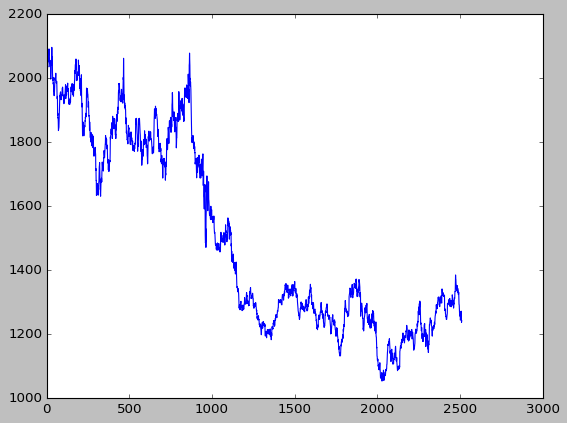

In [81]:
x=df.index
y=df['Open']
# plt(df['Close'],df['Open'])
fig, ax = plt.subplots()
ax.plot(x, y)

Possible conditions:

- Time Series Analysis: Explore trends and patterns in gold prices over a given period.
- Advanced Modeling: Build models to predict future gold prices based on historical data.
- Trading Strategy Development: Develop and reverse trade strategies using the given price and volume information.
- Market Sentiment Analysis: Analyze the impact of market events on gold prices and assess market sentiment.
- Statistical Analysis: Perform tests and statistical analysis to gain insight into the characteristics of gold price movements.

<Axes: >

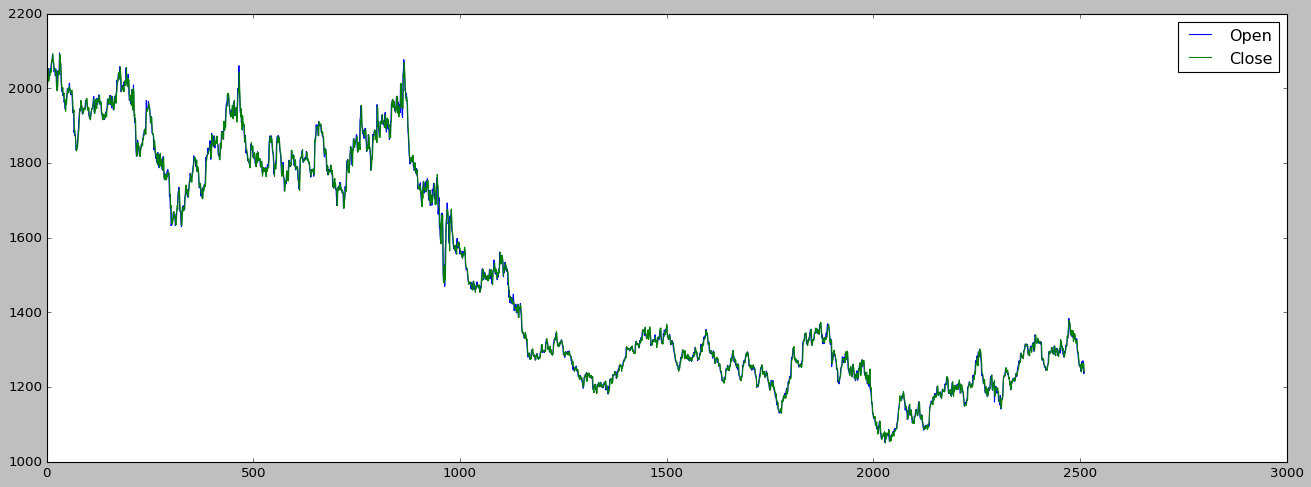

In [82]:
df[['Open','Close']].plot(figsize=(20,7))

<Axes: >

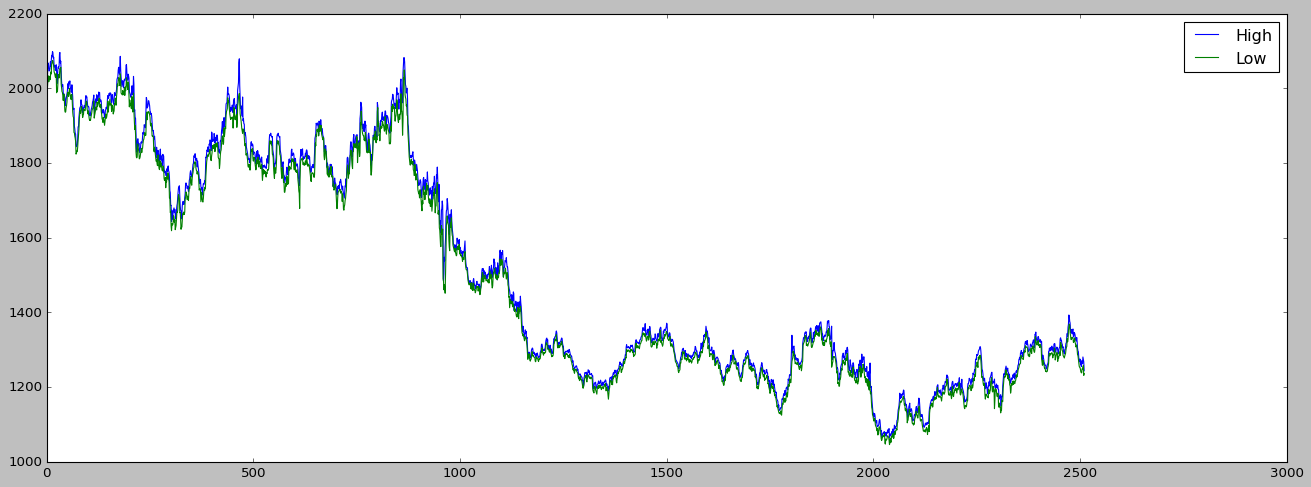

In [83]:
df[['High','Low']].plot(figsize=(20,7))


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test, y_train, y_test=train_test_split(df[['Close', 'Volume', 'Open', 'High', 'Low']],df[["Date"]], random_state=0)

In [86]:
df.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [87]:
print(X_train.shape)
print(y_train.shape)

(1883, 5)
(1883, 1)


In [88]:
print(X_test.shape)
print(y_test.shape)

(628, 5)
(628, 1)


In [89]:
df.columns.values.tolist()

['Date', 'Close', 'Volume', 'Open', 'High', 'Low']

In [90]:
df_toplot=pd.DataFrame(X_train, columns= df.columns.values.tolist())

In [91]:
df_toplot['Date']=y_train

In [92]:
df_toplot

,Date,Close,Volume,Open,High,Low
2085,2015-09-29,1126.8,100406.0,1131.4,1134.3,1123.5
2378,2014-07-31,1282.8,126684.0,1297.0,1298.8,1281.3
1197,2019-04-11,1293.3,311101.0,1312.4,1313.1,1292.9
6,2024-01-10,2027.8,183625.0,2036.0,2046.2,2025.9
2012,2016-01-13,1087.1,146676.0,1086.8,1095.6,1079.4
...,...,...,...,...,...,...
1033,2019-12-04,1480.2,311909.0,1483.2,1489.9,1476.7
1731,2017-02-24,1258.3,209660.0,1250.6,1261.2,1248.8
763,2020-12-31,1895.1,127578.0,1899.0,1904.9,1889.1
835,2020-09-18,1962.1,174242.0,1951.1,1968.2,1951.1


In [93]:
print(df.shape)
print(y_train.shape)

(2511, 6)
(1883, 1)


In [94]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

array([[<Axes: xlabel='Close', ylabel='Close'>,
        <Axes: xlabel='Volume', ylabel='Close'>,
        <Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>],
       [<Axes: xlabel='Close', ylabel='Volume'>,
        <Axes: xlabel='Volume', ylabel='Volume'>,
        <Axes: xlabel='Open', ylabel='Volume'>,
        <Axes: xlabel='High', ylabel='Volume'>,
        <Axes: xlabel='Low', ylabel='Volume'>],
       [<Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>,
        <Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>],
       [<Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>,
        <Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>],
       [<Axes: xlabel='Close', ylabel='Low'>,
       

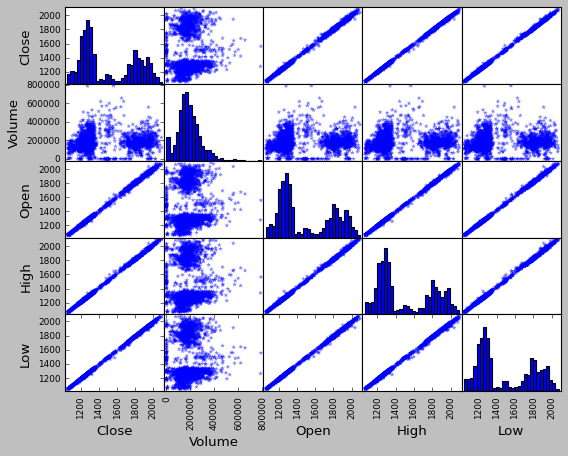

In [95]:
import matplotlib as mpl
plt.style.use('classic')
pd.plotting.scatter_matrix(df_toplot, hist_kwds={'bins':30}, marker='*')

In [96]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

k_Nearest Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn=KNeighborsClassifier(n_neighbors=3)

In [99]:
scaled_X
y_train


,Date
2085,2015-09-29
2378,2014-07-31
1197,2019-04-11
6,2024-01-10
2012,2016-01-13
...,...
1033,2019-12-04
1731,2017-02-24
763,2020-12-31
835,2020-09-18


In [100]:
knn.fit(scaled_X, y_train)

/home/aldona/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [101]:
y_train

,Date
2085,2015-09-29
2378,2014-07-31
1197,2019-04-11
6,2024-01-10
2012,2016-01-13
...,...
1033,2019-12-04
1731,2017-02-24
763,2020-12-31
835,2020-09-18


In [102]:
y_train=np.ravel(y_train)

In [103]:
prediction = knn.predict(y_test)

/home/aldona/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but KNeighborsClassifier is expecting 5 features as input.

In [ ]:
print(prediction)

['2021-07-19T00:00:00.000000000' '2020-07-13T00:00:00.000000000'
 '2015-07-28T00:00:00.000000000' '2015-06-29T00:00:00.000000000'
 '2014-01-30T00:00:00.000000000' '2014-10-21T00:00:00.000000000'
 '2017-04-11T00:00:00.000000000' '2020-03-30T00:00:00.000000000'
 '2020-12-07T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2021-06-23T00:00:00.000000000' '2021-07-14T00:00:00.000000000'
 '2016-11-16T00:00:00.000000000' '2020-07-07T00:00:00.000000000'
 '2015-11-23T00:00:00.000000000' '2014-03-05T00:00:00.000000000'
 '2014-05-19T00:00:00.000000000' '2019-07-24T00:00:00.000000000'
 '2017-01-20T00:00:00.000000000' '2017-03-10T00:00:00.000000000'
 '2014-02-07T00:00:00.000000000' '2016-09-14T00:00:00.000000000'
 '2021-02-11T00:00:00.000000000' '2019-03-25T00:00:00.000000000'
 '2014-06-13T00:00:00.000000000' '2021-01-21T00:00:00.000000000'
 '2021-04-28T00:00:00.000000000' '2015-08-17T00:00:00.000000000'
 '2017-11-20T00:00:00.000000000' '2014-09-05T00:00:00.000000000'
 '2014-08-04T00:00:00.000

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
num = df.select_dtypes(include=['int','float'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(num)

In [ ]:
scaled_X

array([[ 1.77588867, -0.20385836,  1.76779547,  1.77106428,  1.79961012],
       [ 1.75011593, -0.19427661,  1.70660345,  1.71694782,  1.75068292],
       [ 1.69957459,  0.60691146,  1.78217392,  1.75180812,  1.74022262],
       ...,
       [-0.78398021, -1.54714807, -0.78387818, -0.78104149, -0.78273374],
       [-0.79067443, -1.47849764, -0.8815179 , -0.80129366, -0.8708027 ],
       [-0.87067033, -1.08328886, -0.86346124, -0.87964633, -0.85494354]])

In [ ]:
num

,Close,Volume,Open,High,Low
0,2029.3,166078.0,2027.4,2041.9,2022.2
1,2021.6,167013.0,2009.1,2025.6,2007.7
2,2006.5,245194.0,2031.7,2036.1,2004.6
3,2030.2,277995.0,2053.4,2062.8,2027.6
4,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...
2506,1250.5,81426.0,1254.9,1261.9,1248.0
2507,1263.5,63419.0,1269.9,1280.1,1252.0
2508,1264.5,34998.0,1264.3,1273.2,1256.9
2509,1262.5,41697.0,1235.1,1267.1,1230.8


In [ ]:
model = KMeans(n_clusters=3, n_init='auto')
cluster_labels = model.fit_predict(scaled_X)

In [ ]:
num['Cluster'] = cluster_labels
num.head()

,Close,Volume,Open,High,Low,Cluster
0,2029.3,166078.0,2027.4,2041.9,2022.2,0
1,2021.6,167013.0,2009.1,2025.6,2007.7,0
2,2006.5,245194.0,2031.7,2036.1,2004.6,0
3,2030.2,277995.0,2053.4,2062.8,2027.6,0
4,2051.6,250946.0,2033.2,2067.3,2033.1,0


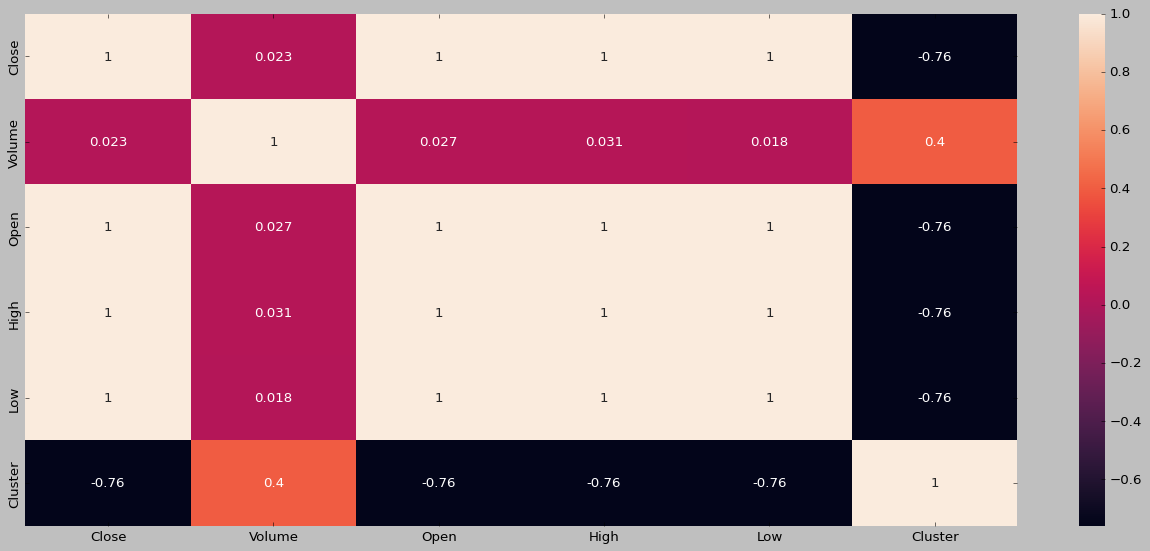

In [ ]:
import seaborn as sns
figure = plt.subplots(figsize=(20,8))
sns.heatmap(num.corr(), annot=True);
plt.show()

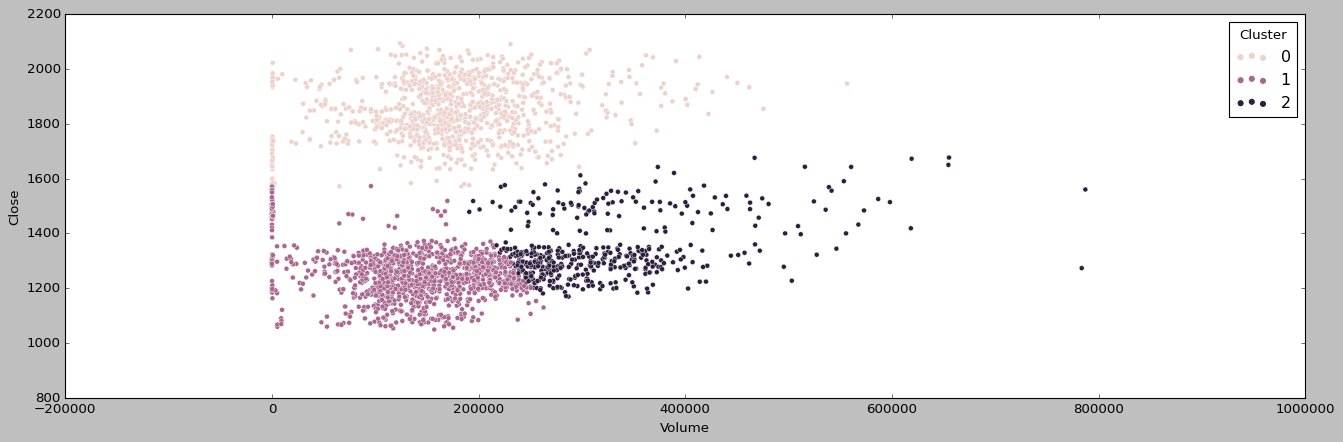

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=num, x=num.Volume, y=num['Close'], hue='Cluster');

In [ ]:
X_train_scaled=StandardScaler(X_train)

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
X_train_list.shape

(9415,)

In [ ]:
num = X_train.select_dtypes(include=['int','float'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(num)

In [ ]:
scaled_X

array([[-1.23764682, -0.88410809, -1.22157679, -1.23513777, -1.22596256],
       [-0.71943071, -0.61258754, -0.67184296, -0.69318516, -0.6973593 ],
       [-0.68455078,  1.29292301, -0.62072037, -0.64607317, -0.65850126],
       ...,
       [ 1.31456756, -0.60335017,  1.32658558,  1.3036384 ,  1.33866773],
       [ 1.53713473, -0.12118885,  1.49953928,  1.51218308,  1.54635722],
       [-0.80679663, -0.42076247, -0.80927642, -0.82562586, -0.79148953]])

In [ ]:
knn.fit(scaled_X, y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
knn=KNeighborsClassifier(n_neighbors=1)